# **Introduction to PyTorch**
### 2022/06/29, AJ Zerouali
### Updated: 2022/07/16

## 1) Introduction

The purpose of this notebook is to gain a basic understanding of PyTorch. I'm following some sections of Pierian Data's course on medical imaging with PyTorch, which I'll abbreviate as PDMIPT from now onwards.

## 2) From NumPy arrays to PyTorch Tensors.

**References:** I'm loosely following:
- Section 4 of the PDMIPT course.
- Chapter 3 of Lapan's "Deep reinforcement learning with PyTorch".

As usual, we start with the imports:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt



In [2]:
%matplotlib inline

In [3]:
# The main import of this notebook
import torch as T

#### Topics to cover

* PyTorch tensors.
* Automatic differentiation.
* 

#### Tensor operations:

The following is from the "Tensor Operations" notebook of PDMIPT:

<table style="display: inline-block">
<caption style="text-align: center"><strong>Arithmetic</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>a + b</td><td>a.add(b)</td><td>element wise addition</td></tr>
<tr><td>a - b</td><td>a.sub(b)</td><td>subtraction</td></tr>
<tr><td>a * b</td><td>a.mul(b)</td><td>multiplication</td></tr>
<tr><td>a / b</td><td>a.div(b)</td><td>division</td></tr>
<tr><td>a % b</td><td>a.fmod(b)</td><td>modulo (remainder after division)</td></tr>
<tr><td>a<sup>b</sup></td><td>a.pow(b)</td><td>power</td></tr>
<tr><td>&nbsp;</td><td></td><td></td></tr>
</table>



<table style="display: inline-block">
<caption style="text-align: center"><strong>Monomial Operations</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>|a|</td><td>torch.abs(a)</td><td>absolute value</td></tr>
<tr><td>1/a</td><td>torch.reciprocal(a)</td><td>reciprocal</td></tr>
<tr><td>$\sqrt{a}$</td><td>torch.sqrt(a)</td><td>square root</td></tr>
<tr><td>log(a)</td><td>torch.log(a)</td><td>natural log</td></tr>
<tr><td>e<sup>a</sup></td><td>torch.exp(a)</td><td>exponential</td></tr>
<tr><td>12.34  ==>  12.</td><td>torch.trunc(a)</td><td>truncated integer</td></tr>
<tr><td>12.34  ==>  0.34</td><td>torch.frac(a)</td><td>fractional component</td></tr>
</table>



<table style="display: inline-block">
<caption style="text-align: center"><strong>Trigonometry</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>sin(a)</td><td>torch.sin(a)</td><td>sine</td></tr>
<tr><td>cos(a)</td><td>torch.sin(a)</td><td>cosine</td></tr>
<tr><td>tan(a)</td><td>torch.sin(a)</td><td>tangent</td></tr>
<tr><td>arcsin(a)</td><td>torch.asin(a)</td><td>arc sine</td></tr>
<tr><td>arccos(a)</td><td>torch.acos(a)</td><td>arc cosine</td></tr>
<tr><td>arctan(a)</td><td>torch.atan(a)</td><td>arc tangent</td></tr>
<tr><td>sinh(a)</td><td>torch.sinh(a)</td><td>hyperbolic sine</td></tr>
<tr><td>cosh(a)</td><td>torch.cosh(a)</td><td>hyperbolic cosine</td></tr>
<tr><td>tanh(a)</td><td>torch.tanh(a)</td><td>hyperbolic tangent</td></tr>
</table>



<table style="display: inline-block">
<caption style="text-align: center"><strong>Summary Statistics</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>$\sum a$</td><td>torch.sum(a)</td><td>sum</td></tr>
<tr><td>$\bar a$</td><td>torch.mean(a)</td><td>mean</td></tr>
<tr><td>a<sub>max</sub></td><td>torch.max(a)</td><td>maximum</td></tr>
<tr><td>a<sub>min</sub></td><td>torch.min(a)</td><td>minimum</td></tr>
<tr><td colspan="3">torch.max(a,b) returns a tensor of size a<br>containing the element wise max between a and b</td></tr>
</table>

## 3) MNIST with fully connected neural net

This part loosely follows Lectures 27-31 of PDMIPT. Some references:
* Portilla's PDMIPT course, Lects. 27-31. Notebook: https://github.com/drgona/Pytorch_bootcamp_Udemy/blob/master/03-CNN-Convolutional-Neural-Networks/00-MNIST-ANN-Code-Along.ipynb.
* Susmelj repo on good design patterns with PyTorch: https://github.com/IgorSusmelj/pytorch-styleguide


**Comments:**
- Portilla loads MNIST from the torchvision (v.0.2.2) package. See yml file given, or Lects. 3-4.
- Portilla uses toch v.1.1.0. I installed 1.8.0 (as of writing, we're at 1.12.0, Colab uses 1.11.0).
- Pierian Data have a PyTorch bootcamp. The course files can be downloaded from:
    https://github.com/drgona/Pytorch_bootcamp_Udemy
    
**To do:**
There are several points to cover:
* How to implement a neural net in PyTorch.
* How to write a training function.
* How to save/load a model.
* Is there a Sequential class as in Keras?
* Automatic differentiation and gradients. This is apparently the crux of why PyTorch is better than TF2, but nobody addresses this material in depth.


#### Imports

Importing *torch.nn* and *torch.nn.functional* aside will add efficiency to our code.

**Remark:** It seems to be recommended to use DataLoader() with Torch when doing batch training.

In [1]:
#import warnings
#warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

import torch as T
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader


In [2]:
from datetime import datetime

In [3]:
%matplotlib inline

In [3]:
help(nn.Module)

Help on class Module in module torch.nn.modules.module:

class Module(builtins.object)
 |  Base class for all neural network modules.
 |  
 |  Your models should also subclass this class.
 |  
 |  Modules can also contain other Modules, allowing to nest them in
 |  a tree structure. You can assign the submodules as regular attributes::
 |  
 |      import torch.nn as nn
 |      import torch.nn.functional as F
 |  
 |      class Model(nn.Module):
 |          def __init__(self):
 |              super(Model, self).__init__()
 |              self.conv1 = nn.Conv2d(1, 20, 5)
 |              self.conv2 = nn.Conv2d(20, 20, 5)
 |  
 |          def forward(self, x):
 |              x = F.relu(self.conv1(x))
 |              return F.relu(self.conv2(x))
 |  
 |  Submodules assigned in this way will be registered, and will have their
 |  parameters converted too when you call :meth:`to`, etc.
 |  
 |  :ivar training: Boolean represents whether this module is in training or
 |                  eval

In [4]:
t = np.arange(0,1,0.01)
sin_t = np.sin(t)

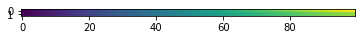

In [5]:
plt.imshow(np.array([t,sin_t]))

### 3.a - Loading the data
Load the reduced MNIST NumPy arrays created previously:

In [6]:
# Training
X_train = np.load(file = "MNIST_Small_Training_FlatImg.npy")
y_train = np.load(file = "MNIST_Small_Training_Labels.npy")
# Testing
X_test = np.load(file = "MNIST_Small_Test_FlatImg.npy")
y_test = np.load(file = "MNIST_Small_Test_Labels.npy")

Now ***rescale*** and ***convert*** the training and test images to torch tensors. We'll also split the training set to training and validation:

In [7]:
# Convert and rescale flattened images
x_train = T.tensor(data = (X_train[0:15000]/255), dtype=T.float32)
x_val = T.tensor(data = (X_train[15000:18000]/255), dtype=T.float32)
x_test = T.tensor(data = (X_test/255), dtype=T.float32)

In [5]:
'''
NOTE: In PyTorch 1.11 (Colab's version), it was enough to convert the labels to tensors.
      The version in which I run this notebook is 1.8, and seems to require the labels
      to be LongTensors (long ints).
y_train_ = T.tensor(data=y_train[:15000])
y_val_ = T.tensor(data=y_train[15000:18000])
y_test_ = T.tensor(data=y_test)
'''

In [8]:
y_train_ = T.LongTensor(data=y_train[:15000])
y_val_ = T.LongTensor(data=y_train[15000:18000])
y_test_ = T.LongTensor(data=y_test)

### 3.b - Fully connected nets in PyTorch

**Main points:**
1) The ANN class is typically inherited from the ***torch.nn.model()*** class.
2) Layers of the ANN, including the no. of units and dimensions of inputs/outputs.
3) Forward method in the

**Questions:**
- How do you convert the labels into one-hot vectors? Use nn.functional.one_hot()
- What is the *super()* statement used in building the neural net?
- How do you conceptualize the attributes od the model and the *forward()* method?
- Why are the loss function and the optimizer outside the network? Can you gather everything in one object as in Keras' *Sequential()*?
- Why's Portilla using log_softmax for the output?

#### 2 - Main class

Our first example will consist of 3 fully connected layers:
* Input layer 1 will take-in flattened images and contain 128 units.
* Second layer will contain 64 units.
* Output layer will output 10 probable classes.

In [9]:
# Hyperparameters
input_dim = 784
layer_1_n_units = 128
layer_2_n_units = 64
output_dim = 10
layer_dim_list = [input_dim, layer_1_n_units, layer_2_n_units, output_dim]

In [10]:
class ANN(nn.Module):
    '''
        ANN class, fully connected with 3 layers:
        * Input layer 1 will take-in flattened images and contain 128 units.
        * Second layer will contain 64 units.
        * Output layer will output 10 probabilities, one for each classes.
    '''
    
    def __init__(self, layer_dim_list=[784,128,64,10]):
        '''
            ARGUMENT: layer_dim_list = [input_dim, layer_1_n_units, layer_2_n_units, output_dim], list of integers.
        '''
        super().__init__() # What is this for?
        self.units_list = layer_dim_list
        self.layer_1_fc = nn.Linear(in_features = self.units_list[0], out_features=self.units_list[1])
        self.layer_2_fc = nn.Linear(in_features = self.units_list[1], out_features=self.units_list[2])
        self.layer_3_fc = nn.Linear(in_features = self.units_list[2], out_features=self.units_list[3])
        
    def forward(self, X):
        '''
            Forward propagation function. Activations by layer:
            * Layer 1: ReLU; * Layer 2: ReLU; * Layer 3: log_softmax
            ARGUMENT: Data X (toch.tensor).
              OUTPUT: Prediction.
        '''
        X = F.relu(self.layer_1_fc(X)) 
        X = F.relu(self.layer_2_fc(X))
        X = self.layer_3_fc(X)
        
        return F.log_softmax(X)

Now we instantiate the model, the loss and the optimizer:

In [11]:
# Model
model = ANN(layer_dim_list)

In [12]:
# Loss function:
loss_fn = nn.CrossEntropyLoss()
# Optimizer:
optimizer = T.optim.Adam(params = model.parameters(), lr = 0.001)

In [33]:
model.units_list

[784, 128, 64, 10]

Next, define the loss function and optimizer for the model. For the latter, ***one explicitly ties the model parameters to the optimizer***. Notes:
* The losses are in the ***torch.nn*** module.
* The optimizers are in the ***torch.optim*** module.
* The *torch.Module()* class has a method **parameters()** that generates an iterator for the optimizer. 


#### 3- Training code:

Quite reminiscent of the TF1 approach. I'm modifying the code from Portilla's notebook below. I don't like how he designed it.

**To do:**
* Are there built-in verbose functions as in Keras for PyTorch?
* Why is the *item()* method used this often?
* I don't understand the second loop over batches. I had the same issue in TensorFlow.
* The central instructions for one training step (for one batch at a given epoch) are:

        optimizer.zero_grad() # Set all gradients to 0
        loss.backward() # Perform backpropagation
        optimizer.step() # What is this
        
   Clarify what these do. They're pretty standard (see the learn method of P. Tabor's DQN agent in PyTorch).

In [13]:
##### TRAINING #####

# Initializations
n_epochs = 10
batch_size = 100
n_batches = int((len(x_train))/batch_size)
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Timer init.
train_begin_time = datetime.now()

# Loop over epochs:
for epoch in range(n_epochs):
    
    train_correct_samples = 0 
    val_correct_samples = 0
    
    # Loop over batches
    for i_batch in range(n_batches):
        '''
            Might have to modify this for validation later
        '''
        # Pick batches
        batch_x = x_train[i_batch*batch_size:(i_batch+1)*batch_size]
        batch_y = y_train_[i_batch*batch_size:(i_batch+1)*batch_size]
        
        # Predict labels and compute loss
        batch_y_pred = model(batch_x) # CLARIFY.
        loss = loss_fn(batch_y_pred, batch_y) # CLARIFY.
        
        # Counter no. of correct predictions and current accuracy
        predicted_digits = T.argmax(batch_y_pred, dim =1)
        batch_correct = (predicted_digits == batch_y).sum().item()
        train_correct_samples += batch_correct
        current_accuracy = (train_correct_samples*100)/((i_batch+1)*batch_size)
        
        # Perform one optimization step
        optimizer.zero_grad() # CLARIFY
        loss.backward() # CLARIFY
        optimizer.step() # CLARIFY

        # Verbose
        '''
        if ( (i_batch+1) %25) == 0:
          # Modify for better formatting
          print(f"Epoch: {epoch+1}; Batch: {i_batch+1}; Loss: {loss.item():10.4f}; Accuracy: {current_accuracy:10.2f}%")
        '''
            
    # END OF BATCH LOOP
    print(f"Epoch: {epoch+1}; Loss: {loss.item():10.4f}; Accuracy: {current_accuracy:10.2f}%")
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss.item())
    train_correct.append(train_correct_samples)

# END EPOCH LOOP

print(f"Training finished. Elapsed time = {datetime.now()-train_begin_time}")

C:\Users\zaj20\AppData\Local\Temp\ipykernel_5264\1048247494.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(X)


Epoch: 1; Loss:     0.3350; Accuracy:      79.33%
Epoch: 2; Loss:     0.2245; Accuracy:      90.82%
Epoch: 3; Loss:     0.1605; Accuracy:      92.69%
Epoch: 4; Loss:     0.1251; Accuracy:      94.03%
Epoch: 5; Loss:     0.1019; Accuracy:      95.09%
Epoch: 6; Loss:     0.0791; Accuracy:      96.00%
Epoch: 7; Loss:     0.0620; Accuracy:      96.87%
Epoch: 8; Loss:     0.0466; Accuracy:      97.43%
Epoch: 9; Loss:     0.0357; Accuracy:      98.01%
Epoch: 10; Loss:     0.0279; Accuracy:      98.43%
Training finished. Elapsed time = 0:00:06.098474


In [27]:
del model, optimizer, loss

In [32]:
train_losses

[0.36283501982688904,
 0.24444255232810974,
 0.17537030577659607,
 0.13065586984157562,
 0.10290651023387909,
 0.08298884332180023,
 0.06564819067716599,
 0.05184834077954292,
 0.03955361992120743,
 0.03164398670196533]

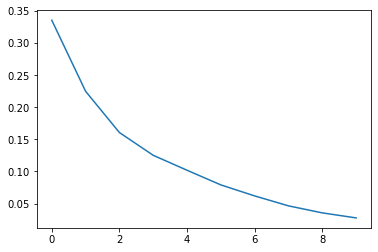

In [14]:
plt.plot(np.arange(10), train_losses)

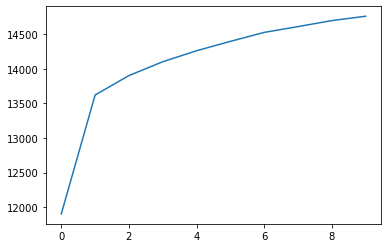

In [16]:
plt.plot(np.arange(10), train_correct)

**Validation**

In [15]:
n_val_batches = int(len(x_val)/batch_size)
val_losses = []
val_correct = []

with T.no_grad():
    
    val_correct_samples = 0

    # Validation loop
    for i_batch in range(n_val_batches):
        
        # Pick batches
        batch_x = x_val[i_batch*batch_size:(i_batch+1)*batch_size]
        batch_y = y_val_[i_batch*batch_size:(i_batch+1)*batch_size]

        # Predict labels and compute loss
        batch_y_pred = model(batch_x) 

        # Counter no. of correct predictions and current accuracy
        predicted_digits = T.argmax(batch_y_pred, dim =1)
        batch_correct = (predicted_digits == batch_y).sum().item()
        val_correct_samples += batch_correct
        #current_accuracy = train_correct_samples/((i_batch+1)*batch_size)

    # END VALIDATION LOOP
    accuracy = (100*val_correct_samples)/len(x_val)
    print(accuracy)

94.4


C:\Users\zaj20\AppData\Local\Temp\ipykernel_5264\1048247494.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(X)


**Notes on softmax and backpropagation in PyTorch:**

My approach for a multi-class classification problem is to convert the labels into one-hot vectors (vectors of integers), and use softmax as the activation of the output layer. Here's my forward function:

            def forward(self, X):
                X = F.relu(self.layer_1_fc(X)) 
                X = F.relu(self.layer_2_fc(X))
                X = self.layer_3_fc(X)

                return F.log_softmax(X)
                
Say I setup my batch by hand:

            batch_x = x_train[i_batch*batch_size:(i_batch+1)*batch_size]
            batch_y = y_cat_train[i_batch*batch_size:(i_batch+1)*batch_size]
            
Then I predict the probabilities:

            

## 4) MNIST with CNN

This part loosely follows Lectures 31-38 of PDMIPT. Here's a reference:

https://github.com/drgona/Pytorch_bootcamp_Udemy/blob/master/03-CNN-Convolutional-Neural-Networks/01-MNIST-with-CNN.ipynb


**To do:**
Main points to cover:
* Specific functions for CNN layers: Convolutional, pooling, loss function.

#### Imports

Importing *torch.nn* and *torch.nn.functional* aside will add efficiency to our code.

**Remark:** It seems to be recommended to use DataLoader() with Torch when doing batch training. I don't use it here though.

In [1]:
#import warnings
#warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

import torch as T
import torch.nn as nn
import torch.nn.functional as F


In [2]:
from datetime import datetime

In [3]:
%matplotlib inline

Next, load the data:

In [4]:
# Training
X_train = np.load(file = "MNIST_Small_Training_FlatImg.npy")
y_train = np.load(file = "MNIST_Small_Training_Labels.npy")
# Testing
X_test = np.load(file = "MNIST_Small_Test_FlatImg.npy")
y_test = np.load(file = "MNIST_Small_Test_Labels.npy")

In [5]:
# Rescale flattened images and convert them to 28x28 tensors
x_train = T.tensor(data = (X_train[0:15000]/255), dtype=T.float32)
x_val = T.tensor(data = (X_train[15000:18000]/255), dtype=T.float32)
x_test = T.tensor(data = (X_test/255), dtype=T.float32)

In [6]:
y_train_ = T.LongTensor(data=y_train[:15000])
y_val_ = T.LongTensor(data=y_train[15000:18000])
y_test_ = T.LongTensor(data=y_test)

#### CNN construction

We reproduce the following Keras model:

            
            cnn_model = Sequential()

            ## Add layers, input->conv->maxpool->flatten->dense->dense
            cnn_model.add(Conv2D(filters= 32, kernel_size= (4,4),\
                                 activation = "relu", input_shape=(n_pxs,n_pxs,1))) # Conv layer
            cnn_model.add(MaxPool2D(pool_size = (2,2)))                             # MaxPool layer
            cnn_model.add(Flatten())                                                # Flattening
            cnn_model.add(Dense(units = 128, activation = "relu"))                  # FC 1
            cnn_model.add(Dense(units = 10, activation = "softmax"))                # FC 2

            # Compile model
            cnn_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Here we'll define many more network hyperparameters, and pay special attention to the coherence of the output dimensions of our layers. A good feature of the PyTorch documentation is that they provide general formulas for these dimensions in their docs:

* **2d-Convolutional layer:** This is ***nn.Conv2D()***, https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html. Here's the signature:

            torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

* **2d-Maxpool layer:** This is ***nn.MaxPool2D()***, https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html.


            torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

In [28]:
class CNN(nn.Module):
    '''
        Small CNN class: input->Conv2D->MaxPool2D->FC1->FC2
        See __init__() for input.
            
    '''
    
    def __init__(self, img_dims = [28, 28, 1], \
                 conv_dims = [4, 4, 1, 1, 32], \
                 pool_dims = [2, 2], \
                 fc1_units = 128, n_classes=10):
        '''
            ARGUMENTS:
            Lists of dimensions for each layer of CNN. Default is MNIST for input.
            Convention as follows:
            * img_dims = [in_height, in_width, in_channels], dims of input images.
            * conv_dims = [conv_ker_ht, conv_ker_wd, conv_str_ht, conv_str_wd, n_conv_filters]
            * pool_dims = [pool_ver, pool_hor]. Here stride size = kernel size.
            * fc1_units = no. of neurons in fully connected layer.
            * n_classes = no. of classes or dim. of output layer.
            
            
        '''
        super().__init__()
        
        #####################
        ## HYPERPARAMETERS ##
        #####################
        
        # Input image dimensions
        self.in_height = img_dims[0]
        self.in_width = img_dims[1]
        self.in_channels = img_dims[2]
        
        # Conv. layer hyperparam.
        ## Using 0 padding 
        self.conv_ker_ht = conv_dims[0]
        self.conv_ker_wd = conv_dims[1]
        self.conv_str_ht = conv_dims[2]
        self.conv_str_wd = conv_dims[3]
        self.n_conv_filters = conv_dims[4]
        self.conv_out_ht = int((self.in_height-self.conv_ker_ht)/ self.conv_str_ht)+1
        self.conv_out_wd = int((self.in_width-self.conv_ker_wd)/ self.conv_str_wd)/+1
        
        # Pooling layer hyperparam.
        ## Using 0 padding, stride size = "kernel" size
        self.pool_ver = pool_dims[0]
        self.pool_hor = pool_dims[1]
        
        # FC1 layer dim
        self.fc1_dim_in = self.n_conv_filters*int(self.conv_out_ht/self.pool_ver)\
                            *int(self.conv_out_wd/self.pool_hor)
        self.fc1_units = fc1_units
        
        # Out (FC2) layer dim (no. of classes)
        self.n_classes = n_classes
        
        #####################
        ##      LAYERS     ##
        #####################
        
        #self.cnn_dim_list = cnn_dim_list # useful? necessary?
        '''
            CONVOLUTIONAL LAYER
            torch.nn.Conv2d(in_channels, out_channels, kernel_size, \
                            stride=1, padding=0, dilation=1, groups=1, \
                            bias=True, padding_mode='zeros', device=None, dtype=None)
            in_channels and out_channels are ints, not 
        '''
        self.layer_1_conv = nn.Conv2d(in_channels = self.in_channels, \
                                      out_channels = self.n_conv_filters,\
                                      kernel_size = (self.conv_ker_ht, self.conv_ker_wd),\
                                      stride = (self.conv_str_ht, self.conv_str_wd), \
                                      padding=0)
        '''
            MAXPOOL LAYER
            torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, \
                                dilation=1, return_indices=False, ceil_mode=False)
        '''
        self.layer_2_maxpl = nn.MaxPool2d(kernel_size= (self.pool_ver, self.pool_hor), \
                                          stride = (self.pool_ver, self.pool_hor), padding=0)
        self.layer_3_fc = nn.Linear(in_features=self.fc1_dim_in, out_features=self.fc1_units)
        self.layer_4_fc = nn.Linear(in_features=self.fc1_units, out_features=self.n_classes)
        
    def forward(self, X):
        
        X = self.layer_1_conv(X)
        X = self.layer_2_maxpl(X)
        X = F.relu(self.layer_3_fc(X.reshape(-1,self.fc1_dim_in))) # Flatten images here
        X = F.log_softmax(self.layer_4_fc(X), dim =1)
        
        return X
    
    

#### Instantiating the model

To avoid conflicts with the previous ANN, the CNN model will be called *cnn_model*

In [36]:
# Refresh model
del cnn_model, cnn_loss_fn, optimizer

In [37]:
###################################
##### Network hyperparameters #####
###################################

# Input/Final Output
n_height = 28
n_width = 28
n_channels = 1

# Conv. layer
conv_ker_ht = 4
conv_ker_wd = 4
conv_n_filters = 32

# MaxPool layer
pool_ver = 2 
pool_hor = 2

# Dims of 2 fully connected layers
fc1_dim_out = 128
n_classes = 10

'''
conv_out_ht = n_height-conv_ker_ht +1
conv_out_wd = n_width-conv_ker_wd +1

fc1_dim_in = np.int(conv_out_ht/pool_ver)*\
             np.int(conv_out_wd/pool_hor)*\
             conv_n_filters
'''

'\nconv_out_ht = n_height-conv_ker_ht +1\nconv_out_wd = n_width-conv_ker_wd +1\n\nfc1_dim_in = np.int(conv_out_ht/pool_ver)*             np.int(conv_out_wd/pool_hor)*             conv_n_filters\n'

In [38]:
# Model
cnn_model = CNN(img_dims=[n_height, n_width, n_channels],\
                conv_dims=[conv_ker_ht, conv_ker_wd, 1, 1, conv_n_filters],\
                pool_dims=[pool_ver, pool_hor], \
                fc1_units=fc1_dim_out, n_classes = n_classes)

In [39]:
# Loss function:
cnn_loss_fn = nn.CrossEntropyLoss()
# Optimizer:
optimizer = T.optim.Adam(params = cnn_model.parameters(), lr = 0.001)

#### Training code:

In [40]:
##### TRAINING #####

# Initializations
n_epochs = 10
batch_size = 100
n_batches = int((len(x_train))/batch_size)
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Timer init.
train_begin_time = datetime.now()

# Loop over epochs:
for epoch in range(n_epochs):
    
    train_correct_samples = 0 
    val_correct_samples = 0
    
    # Loop over batches
    for i_batch in range(n_batches):
        '''
            Might have to modify this for validation later
        '''
        # Pick batches
        batch_x = x_train.reshape(len(x_train), n_channels, n_height,n_width)\
                            [i_batch*batch_size:(i_batch+1)*batch_size]
        batch_y = y_train_[i_batch*batch_size:(i_batch+1)*batch_size]
        
        # Predict labels and compute loss
        batch_y_pred = cnn_model(batch_x) # CLARIFY.
        loss = cnn_loss_fn(batch_y_pred, batch_y) # CLARIFY.
        
        # Counter no. of correct predictions and current accuracy
        predicted_digits = T.argmax(batch_y_pred, dim =1)
        batch_correct = (predicted_digits == batch_y).sum().item()
        train_correct_samples += batch_correct
        current_accuracy = (train_correct_samples*100)/((i_batch+1)*batch_size)
        
        # Perform one optimization step
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 
        
    # END OF BATCH LOOP
    print(f"Epoch: {epoch+1}; Loss: {loss.item():10.4f}; Accuracy: {current_accuracy:10.2f}%")
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss.item())
    train_correct.append(train_correct_samples)

# END EPOCH LOOP

print(f"Training finished. Elapsed time = {datetime.now()-train_begin_time}")

Epoch: 1; Loss:     0.2577; Accuracy:      84.77%
Epoch: 2; Loss:     0.1320; Accuracy:      93.10%
Epoch: 3; Loss:     0.0794; Accuracy:      95.23%
Epoch: 4; Loss:     0.0582; Accuracy:      96.55%
Epoch: 5; Loss:     0.0450; Accuracy:      97.63%
Epoch: 6; Loss:     0.0378; Accuracy:      98.39%
Epoch: 7; Loss:     0.0247; Accuracy:      98.83%
Epoch: 8; Loss:     0.0136; Accuracy:      99.24%
Epoch: 9; Loss:     0.0104; Accuracy:      99.58%
Epoch: 10; Loss:     0.0097; Accuracy:      99.78%
Training finished. Elapsed time = 0:02:08.680822


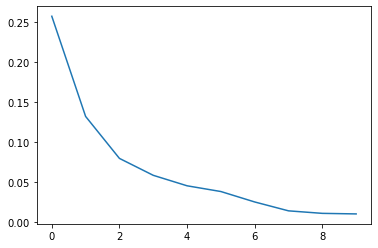

In [41]:
plt.plot(np.arange(10), train_losses)

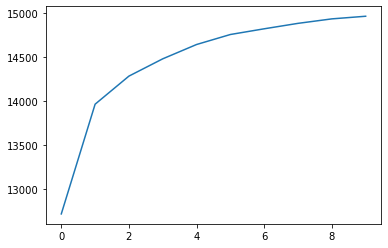

In [42]:
plt.plot(np.arange(10), train_correct)

#### Validation code:

In [43]:
n_val_batches = int(len(x_val)/batch_size)
val_losses = []
val_correct = []

with T.no_grad():
    
    val_correct_samples = 0

    # Validation loop
    for i_batch in range(n_val_batches):
        
        # Pick batches
        batch_x = x_val.reshape(len(x_val), n_channels, n_height, n_width)[i_batch*batch_size:(i_batch+1)*batch_size]
        batch_y = y_val_[i_batch*batch_size:(i_batch+1)*batch_size]

        # Predict labels and compute loss
        batch_y_pred = cnn_model(batch_x) 

        # Counter no. of correct predictions and current accuracy
        predicted_digits = T.argmax(batch_y_pred, dim =1)
        batch_correct = (predicted_digits == batch_y).sum().item()
        val_correct_samples += batch_correct
        #current_accuracy = train_correct_samples/((i_batch+1)*batch_size)

    # END VALIDATION LOOP
    accuracy = (100*val_correct_samples)/len(x_val)
    print(f"Accuracy on validation set: {accuracy}%")

Accuracy on validation set: 96.6%


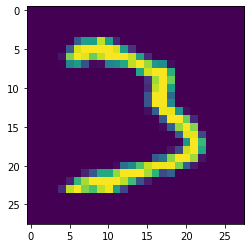

In [44]:
img_id = np.random.randint(0,len(x_test))
plt.imshow(x_test[img_id].reshape(28,28))

In [45]:
img_pred = T.argmax(cnn_model(x_test[img_id].reshape(1,28,28)), dim = 1)
print(f"Predicted digit is: {img_pred.item()}")

Predicted digit is: 3


#### Some comments:

1)  Here's an intersting difference compared to TensorFlow: When making Conv2D and MaxPool2D layers, you specify only the number of input channels and the number of output channels (TF call this no. of filters). Indeed, as with Keras, you don't need to specify of the height and width pixels. Another note is how torch manages to be more accurate that TF with 1/2 the number of epochs. However, TF seems slightly faster at this specfic task with 20 epochs.

2) I had a conceptual mistake previously: Image filters need not be symmetric matrices. A good set of practical and interactive examples can be found at: https://setosa.io/ev/image-kernels/. Note the Sobel filters in particular, which aren't symmetric, but allow one to extract sharp edges. The Blur, Sharpen, Emboss, and Outline filters are symmetric matrices.

3) For a theoretical discussion of convolutional and pooling layers, the convolution operation, convergence results for max/min/average pooling, and translation invariance, see chapters 15 and 16 of Calin's "Deep learning Architectures - A mathematical approach". In particular, he shows in the proof of Theorem 15.1.1 that the max/min/average pooling operations on functions of real variables define sequences that converge uniformly to the approximated function. Here the index n is the cardinality of the partition of the support, and it works because these operations essentially define simple functions (as in the ones seen in measure theory).

## 4)' Addendum: CNN with DataLoader

Adding the use of a dataloader. Still following:

https://github.com/drgona/Pytorch_bootcamp_Udemy/blob/master/03-CNN-Convolutional-Neural-Networks/01-MNIST-with-CNN.ipynb


#### Imports

In [7]:
#import warnings
#warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

import torch as T
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset

In [2]:
from datetime import datetime

In [3]:
%matplotlib inline

#### Reduced MNIST with Dataset and DataLoader classes

First, we load our dataset, we rescale the images, and convert the images and labels to torch tensors.

In [4]:
# Training
X_train = np.load(file = "MNIST_Small_Training_FlatImg.npy")
y_train = np.load(file = "MNIST_Small_Training_Labels.npy")
# Testing
X_test = np.load(file = "MNIST_Small_Test_FlatImg.npy")
y_test = np.load(file = "MNIST_Small_Test_Labels.npy")

In [5]:
# Rescale flattened images and convert them to 28x28 tensors
x_train = T.tensor(data = (X_train[0:15000]/255), dtype=T.float32)
x_val = T.tensor(data = (X_train[15000:18000]/255), dtype=T.float32)
x_test = T.tensor(data = (X_test/255), dtype=T.float32)

In [6]:
y_train_ = T.LongTensor(data=y_train[:15000])
y_val_ = T.LongTensor(data=y_train[15000:18000])
y_test_ = T.LongTensor(data=y_test)


Here we use the Dataset and DataLoader classes of *torch.utils.data*. Here is a useful guide:

https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel

The official documentation (very dense) is at the link:

https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

Our next step is to write a custom class inherited from Dataset. There are 3 methods to implement:

* **The constructor:** To specify the attributes of our dataset. Here these are images and the digits (labels).
* **len() overload:** To obtain the number of elements in the dataset. Obviously used when constructing batches.
* **getitem() overload:** To use indexing on our dataset and access its contents.


In [11]:
class MNIST_red(Dataset):
    '''
        Has 2 attributes:
        * X (images): Flattened MNIST images, of size (N_samples, 784) and type torch.tensor()
        * y (labels): Integers representing the digits in X, of size (N_samples, ) and type torch.LongTensor()
    '''
    
    def __init__(self, images, labels):
        # Basics
        self.X = images
        self.y = labels
        
    def __len__(self):
        # For number of samples
        return len(self.X)
    
    def __getitem__(self,idx):
        # For indexing
        return (self.X[idx], self.y[idx])

Now we organize our training, validation, and test data into this new class:

In [19]:
Dataset_train = MNIST_red(x_train, y_train_)
Dataset_val = MNIST_red(x_val, y_val_)
Dataset_test = MNIST_red(x_test, y_test_)

Finally, we instantiate our data loaders for the training and validation (similar to the generators used with Keras). The important arguments are *data*, *batch_size* and *shuffle*. Typically, *DataLoader()* is used with the *Dataset()* class.

In [21]:
train_loader = DataLoader(dataset=Dataset_train, batch_size = 100, shuffle = True)

In [22]:
val_loader = DataLoader(dataset=Dataset_val, batch_size = 100, shuffle = False)

These are used respectively in the training and validation code after the constructions of our CNN.

#### CNN construction

Same CNN as above:

In [23]:
class CNN(nn.Module):
    '''
        Small CNN class: input->Conv2D->MaxPool2D->FC1->FC2
        See __init__() for input.
            
    '''
    
    def __init__(self, img_dims = [28, 28, 1], \
                 conv_dims = [4, 4, 1, 1, 32], \
                 pool_dims = [2, 2], \
                 fc1_units = 128, n_classes=10):
        '''
            ARGUMENTS:
            Lists of dimensions for each layer of CNN. Default is MNIST for input.
            Convention as follows:
            * img_dims = [in_height, in_width, in_channels], dims of input images.
            * conv_dims = [conv_ker_ht, conv_ker_wd, conv_str_ht, conv_str_wd, n_conv_filters]
            * pool_dims = [pool_ver, pool_hor]. Here stride size = kernel size.
            * fc1_units = no. of neurons in fully connected layer.
            * n_classes = no. of classes or dim. of output layer.
            
            
        '''
        super().__init__()
        
        #####################
        ## HYPERPARAMETERS ##
        #####################
        
        # Input image dimensions
        self.in_height = img_dims[0]
        self.in_width = img_dims[1]
        self.in_channels = img_dims[2]
        
        # Conv. layer hyperparam.
        ## Using 0 padding 
        self.conv_ker_ht = conv_dims[0]
        self.conv_ker_wd = conv_dims[1]
        self.conv_str_ht = conv_dims[2]
        self.conv_str_wd = conv_dims[3]
        self.n_conv_filters = conv_dims[4]
        self.conv_out_ht = int((self.in_height-self.conv_ker_ht)/ self.conv_str_ht)+1
        self.conv_out_wd = int((self.in_width-self.conv_ker_wd)/ self.conv_str_wd)/+1
        
        # Pooling layer hyperparam.
        ## Using 0 padding, stride size = "kernel" size
        self.pool_ver = pool_dims[0]
        self.pool_hor = pool_dims[1]
        
        # FC1 layer dim
        self.fc1_dim_in = self.n_conv_filters*int(self.conv_out_ht/self.pool_ver)\
                            *int(self.conv_out_wd/self.pool_hor)
        self.fc1_units = fc1_units
        
        # Out (FC2) layer dim (no. of classes)
        self.n_classes = n_classes
        
        #####################
        ##      LAYERS     ##
        #####################
        
        #self.cnn_dim_list = cnn_dim_list # useful? necessary?
        '''
            CONVOLUTIONAL LAYER
            torch.nn.Conv2d(in_channels, out_channels, kernel_size, \
                            stride=1, padding=0, dilation=1, groups=1, \
                            bias=True, padding_mode='zeros', device=None, dtype=None)
            in_channels and out_channels are ints, not 
        '''
        self.layer_1_conv = nn.Conv2d(in_channels = self.in_channels, \
                                      out_channels = self.n_conv_filters,\
                                      kernel_size = (self.conv_ker_ht, self.conv_ker_wd),\
                                      stride = (self.conv_str_ht, self.conv_str_wd), \
                                      padding=0)
        '''
            MAXPOOL LAYER
            torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, \
                                dilation=1, return_indices=False, ceil_mode=False)
        '''
        self.layer_2_maxpl = nn.MaxPool2d(kernel_size= (self.pool_ver, self.pool_hor), \
                                          stride = (self.pool_ver, self.pool_hor), padding=0)
        self.layer_3_fc = nn.Linear(in_features=self.fc1_dim_in, out_features=self.fc1_units)
        self.layer_4_fc = nn.Linear(in_features=self.fc1_units, out_features=self.n_classes)
        
    def forward(self, X):
        
        X = self.layer_1_conv(X)
        X = self.layer_2_maxpl(X)
        X = F.relu(self.layer_3_fc(X.reshape(-1,self.fc1_dim_in))) # Flatten images here
        X = F.log_softmax(self.layer_4_fc(X), dim =1)
        
        return X
    
    

#### Instantiating the model

To avoid conflicts with the previous ANN, the CNN model will be called *cnn_model*

In [36]:
# Refresh model
del cnn_model, cnn_loss_fn, optimizer

In [24]:
###################################
##### Network hyperparameters #####
###################################

# Input/Final Output
n_height = 28
n_width = 28
n_channels = 1

# Conv. layer
conv_ker_ht = 4
conv_ker_wd = 4
conv_n_filters = 32

# MaxPool layer
pool_ver = 2 
pool_hor = 2

# Dims of 2 fully connected layers
fc1_dim_out = 128
n_classes = 10

In [25]:
# Model
cnn_model = CNN(img_dims=[n_height, n_width, n_channels],\
                conv_dims=[conv_ker_ht, conv_ker_wd, 1, 1, conv_n_filters],\
                pool_dims=[pool_ver, pool_hor], \
                fc1_units=fc1_dim_out, n_classes = n_classes)

In [26]:
# Loss function:
cnn_loss_fn = nn.CrossEntropyLoss()
# Optimizer:
optimizer = T.optim.Adam(params = cnn_model.parameters(), lr = 0.001)

#### Training code:

In [65]:
##### TRAINING #####

# Initializations
n_epochs = 10
batch_size = 100
n_batches = len(train_loader)
train_losses = []
test_losses = []
train_correct = []
test_correct = []

'''
# Should normally make the DataLoader() here:
train_loader = DataLoader(dataset = Dataset_train, batch_size = batch_size, shuffle = True)
'''

# Timer init.
train_begin_time = datetime.now()

# Loop over epochs:
for epoch in range(n_epochs):
    
    train_correct_samples = 0 
    val_correct_samples = 0
    
    # Loop over batches
    #for i_batch in range(n_batches):
    for i_batch, (batch_x, batch_y) in enumerate(train_loader):
        
        # Predict labels and compute loss
        batch_y_pred = cnn_model(batch_x.reshape(batch_size, n_channels, n_height, n_width)) # CLARIFY.
        loss = cnn_loss_fn(batch_y_pred, batch_y) # CLARIFY.
        
        # Counter no. of correct predictions and current accuracy
        predicted_digits = T.argmax(batch_y_pred, dim =1)
        batch_correct = (predicted_digits == batch_y).sum().item()
        train_correct_samples += batch_correct
        current_accuracy = (train_correct_samples*100)/((i_batch+1)*batch_size)
        
        # Perform one optimization step
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 
        
    # END OF BATCH LOOP
    print(f"Epoch: {epoch+1}; Loss: {loss.item():10.4f}; Accuracy: {current_accuracy:10.2f}%")
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss.item())
    train_correct.append(train_correct_samples)

# END EPOCH LOOP

print(f"Training finished. Elapsed time = {datetime.now()-train_begin_time}")

Epoch: 1; Loss:     0.1594; Accuracy:      86.23%
Epoch: 2; Loss:     0.1445; Accuracy:      94.05%
Epoch: 3; Loss:     0.1079; Accuracy:      96.35%
Epoch: 4; Loss:     0.0674; Accuracy:      97.52%
Epoch: 5; Loss:     0.1086; Accuracy:      98.33%
Epoch: 6; Loss:     0.0406; Accuracy:      98.81%
Epoch: 7; Loss:     0.0207; Accuracy:      99.19%
Epoch: 8; Loss:     0.0171; Accuracy:      99.48%
Epoch: 9; Loss:     0.0036; Accuracy:      99.74%
Epoch: 10; Loss:     0.0056; Accuracy:      99.88%
Training finished. Elapsed time = 0:01:58.675659


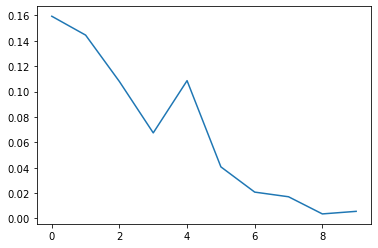

In [66]:
plt.plot(np.arange(10), train_losses)

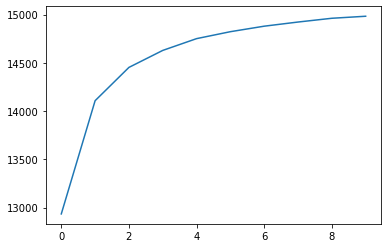

In [67]:
plt.plot(np.arange(10), train_correct)

#### Validation code:

In [68]:
'''
# Previously
val_loader = DataLoader(dataset = Dataset_val, batch_size = batch_size, shuffle = False)
'''
n_val_batches = len(val_loader)
val_losses = []
val_correct = []

with T.no_grad():
    
    val_correct_samples = 0

    # Validation loop
    for i_batch, (batch_x, batch_y) in enumerate(val_loader):
        
        # Predict labels and compute loss
        batch_y_pred = cnn_model(batch_x.reshape(batch_size, n_channels, n_height, n_width)) 

        # Counter no. of correct predictions and current accuracy
        predicted_digits = T.argmax(batch_y_pred, dim =1)
        batch_correct = (predicted_digits == batch_y).sum().item()
        val_correct_samples += batch_correct
        #current_accuracy = train_correct_samples/((i_batch+1)*batch_size)
        print(f"Done validation on batch {i_batch+1}...")

    # END VALIDATION LOOP
    accuracy = (100*val_correct_samples)/len(x_val)
    print(f"Accuracy on validation set: {accuracy}%")

Done validation on batch 1...
Done validation on batch 2...
Done validation on batch 3...
Done validation on batch 4...
Done validation on batch 5...
Done validation on batch 6...
Done validation on batch 7...
Done validation on batch 8...
Done validation on batch 9...
Done validation on batch 10...
Done validation on batch 11...
Done validation on batch 12...
Done validation on batch 13...
Done validation on batch 14...
Done validation on batch 15...
Done validation on batch 16...
Done validation on batch 17...
Done validation on batch 18...
Done validation on batch 19...
Done validation on batch 20...
Done validation on batch 21...
Done validation on batch 22...
Done validation on batch 23...
Done validation on batch 24...
Done validation on batch 25...
Done validation on batch 26...
Done validation on batch 27...
Done validation on batch 28...
Done validation on batch 29...
Done validation on batch 30...
Accuracy on validation set: 97.1%


**Remarks:** This takes slightly less time than the code without data loader and achieves a slightly higher accuracy.